# LINEAR ALGEBRA

# Contents
- Linear Algebra
    - Overview
    - Vectors
    - Matrices
    - Solving Systems of Equations
    - Eigenvalues and Eigenvectors
    - Further Topics
    - Exercises


## Overview
Linear algebra is one of the most useful branches of applied mathematics for economists to invest in.

For example, many applied problems in economics and finance require the solution of a linear system of equations, such as

$$
y_1 = ax_1+bx_2
$$
$$
y_2 = cx_1+dx_2
$$

or, more generally,

<a id='system-of-equations'></a>
$$
\begin{aligned}
y_1 = a_{11}x_1+a_{12}x_2+\dots+a_{1k}x_k\\
\vdots\\
y_n = a_{n1}x_1+a_{n2}x_2+\dots+a_{nk}x_k\\
\end{aligned}\tag{2.1}
$$

The objective here is to solve for the “unknowns” $x_1,\dots,x_k$ given $a_{11},\dots,a_{nk}$ and $y_1,\dots,y_n$. When considering such problems, it is essential that we first consider at least some of the following questions
- Does a solution actually exist?
- Are there in fact many solutions, and if so how should we interpret them?
- If no solution exists, is there a best “approximate” solution?
- If a solution exists, how should we compute it?

These are the kinds of topics addressed by linear algebra. We will cover the basics of linear and matrix algebra, treating both theory and computation.

Let’s start with some imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import inv, solve, det, eig

plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

## Vectors

A vector of length $n$ is just a sequence (or array, or tuple) of $n$ numbers, which we write as $x=(x_1,\dots,x_n)$ or $x=[x_1,\dots,x_n]$ 

We will write these sequences either horizontally or vertically as we please. (Later, when we wish to perform certain matrix operations, it will become necessary to distinguish between the two). The set of all $n$-vectors is denoted by $\mathbb R^n$. For example, $\mathbb R^2$ is the plane, and a vector in $\mathbb R^2$ is just a point in the plane. 

Traditionally, vectors are represented visually as arrows from the origin to the point. The following figure represents three vectors in this manner

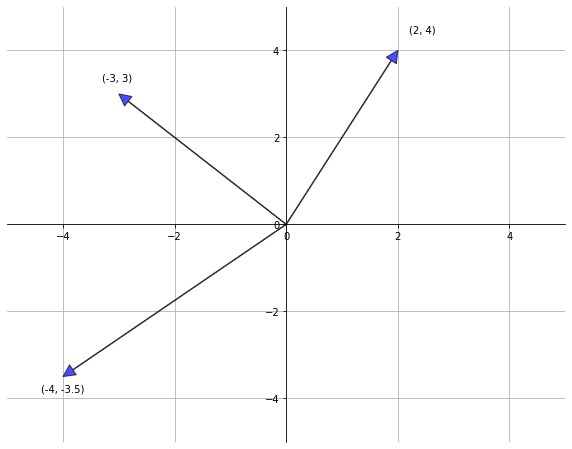

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

### Vector Operations

The two most common operators for vectors are addition and scalar multiplication, which we now describe. As a matter of definition, when we add two vectors, we add them element-by-element

$$
x+y = 
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{bmatrix}
+\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
=\begin{bmatrix}
x_1+y_1\\
x_2+y_2\\
\vdots\\
x_n+y_n
\end{bmatrix}
$$

Scalar multiplication is an operation that takes a number $\gamma$ and a vector $x$ and produces

$$
\gamma x = 
\begin{bmatrix}
\gamma x_1\\
\gamma x_2\\
\vdots\\
\gamma x_n
\end{bmatrix}
$$

Scalar multiplication is illustrated in the next figure

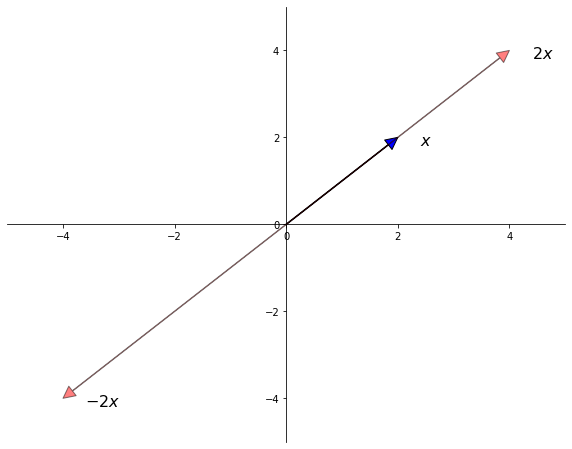

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

In Python, a vector can be represented as a `list` or `tuple`, such as $x = (2, 4, 6)$, but is more commonly represented as a NumPy array. One advantage of NumPy arrays is that scalar multiplication and addition have very natural syntax

In [15]:
x = np.ones(3)            # Vector of three ones
y = np.array((2, 4, 6))   # Converts tuple (2, 4, 6) into array
x + y

array([3., 5., 7.])

In [16]:
4 * x

array([4., 4., 4.])

### Inner Product and Norm

The *inner product* of vectors $x,y\in\mathbb R^n$ is defined as
$$
x'y := \sum_{i=1}^n x_i y_i
$$

Two vectors are called *orthogonal* if their inner product is zero. The norm of a vector $x$ represents its “length” (i.e., its distance from the zero vector) and is defined as

$$
\Vert x \Vert := \sqrt{x'x} := \left(\sum_{i=1}^n x_i^2\right)^{\frac{1}{2}}
$$

The expression $\Vert x-y\Vert$ is thought of as the distance between $x$ and $y$. Continuing on from the previous example, the inner product and norm can be computed as follows

In [17]:
np.sum(x * y)          # Inner product of x and y

12.0

In [18]:
np.sqrt(np.sum(x**2))  # Norm of x, take one

1.7320508075688772

In [19]:
np.linalg.norm(x)      # Norm of x, take two

1.7320508075688772

### Span

Given a set of vectors $A:=\{ a_1, \dots, a_k\}$ in $\mathbb R^n$, it’s natural to think about the new vectors we can create by performing linear operations. New vectors created in this manner are called linear combinations of $A$. In particular, $y\in\mathbb R^n$ is a linear combination of $A$ if

$$
y= \beta_1a_1+ \dots+\beta_k a_k \text{ for some scalars/coefficients } \beta_1,\dots,\beta_k
$$

The set of linear combinations of $A$ is called the span of $A$. The next figure shows the span of $A = \{a_1, a_2\}$ in $\mathbb R^3$. The span is a two-dimensional plane passing through these two points and the origin.

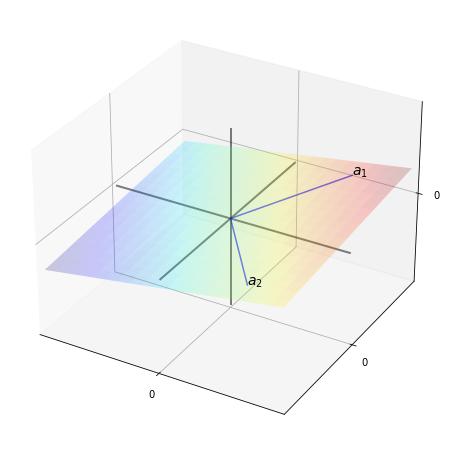

In [ ]:
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

alpha, beta = 0.2, 0.1

ax.set(xlim=(x_min, x_max), 
       ylim=(x_min, x_max), 
       zlim=(x_min, x_max),
       xticks=(0,), 
       yticks=(0,), 
       zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return alpha * x + beta * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], 
            y_coords[i], 
            z[i], 
            f'$a_{i+1}$', 
            fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()

**Examples**

If $A$ contains only one vector $a_1\in\mathbb R^2$, then its span is just the scalar multiples of $a_1$, which is the unique line passing through both $a_1$ and the origin. If $A = \{e_1, e_2, e_3\}$ consists of the *canonical basis vectors* of $\mathbb R^3$, that is

$$
e_1 := 
\begin{bmatrix}
1\\
0\\
0\\
\end{bmatrix}, 
e_2 := 
\begin{bmatrix}
0\\
1\\
0\\
\end{bmatrix}, 
e_3 := 
\begin{bmatrix}
0\\
0\\
1\\
\end{bmatrix}
$$

then the span of $A$ is all of $\mathbb R^3$, because, for any $x = (x_1,x_2,x_3)\in\mathbb R^3$, we can write

$$
x = x_1e_1+x_2e_2+x_3e_3
$$

Now consider $A_0 = \{e_1,e_2,e_1+e_2\}$. If $y=(y_1,y_2,y_3)$ is any linear combination of these vectors, then $y_3=0$ (check it). Hence $A_0$ fails to span all of $\mathbb R^3$.

### Linear Independence

As we’ll see, it’s often desirable to find families of vectors with relatively large span, so that many vectors can be described by linear operators on a few vectors. The condition we need for a set of vectors to have a large span is what’s called linear independence. In particular, a collection of vectors $A:=\{ a_1, \dots, a_k\}$ in $\mathbb R^n$ is said to be
- *linearly dependent* if some strict subset of $A$ has the same span as $A$.
- *linearly independent* if it is not linearly dependent.

Put differently, a set of vectors is linearly independent if no vector is redundant to the span and linearly dependent otherwise. To illustrate the idea, recall the figure that showed the span of vectors $\{a_1,a_2\}$ in $\mathbb R^3$ as a plane through the origin. If we take a third vector $a_3$ and form the set $\{a_1,a_2,a_3\}$, this set will be
- linearly dependent if $a_3$ lies in the plane
- linearly independent otherwise

As another illustration of the concept, since $\mathbb R^n$ can be spanned by $n$ vectors (see the discussion of canonical basis vectors above), any collection of $m>n$ vectors in $\mathbb R^n$ must be linearly dependent.

The following statements are equivalent to linear independence of $A:=\{ a_1, \dots, a_k\}\subset\mathbb R^n$ 
1. No vector in $A$ can be formed as a linear combination of the other elements.
2. If $\beta_1a_1+ \dots+\beta_k a_k=0 \text{ for all scalars/coefficients } \beta_1,\dots,\beta_k$, then $\beta_1=\dots=\beta_k=0$

(The zero in the first expression is the origin of $\mathbb R^n$)

### Unique Representations 

Another nice thing about sets of linearly independent vectors is that each element in the span has a unique representation as a linear combination of these vectors. In other words, if $A:=\{ a_1, \dots, a_k\}\subset\mathbb R^n$ is linearly independent and
$y = \beta_1 a_1+ \dots+\beta_k a_k$ then no other coefficient sequence $\gamma_1,\dots\gamma_k$ will produce the same vector $y$.

Otherwise, if we also have $y = \gamma_1 a_1+ \dots+\gamma_k a_k$ then $(\gamma_1 -\beta_1)a_1+ \dots+(\gamma_k -\beta+k)a_k = 0$ hence $\gamma_i = \beta_i$ for all i.

## Matrices

Matrices are a neat way of organizing data for use in linear operations. An $n\times k$ matrix is a rectangular array $A$ of numbers with $n$ rows and $k$ columns:

$$
A = 
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1k}\\
a_{21} & a_{22} & \dots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nk}
\end{bmatrix}
$$

Often, the numbers in the matrix represent coefficients in a system of linear equations, as discussed at the start. For obvious reasons, the matrix $A$ is also called a vector if either $n=1$ or $k=1$. In the former case, $A$ is called a *row vector*, while in the latter it is called a *column vector*. If $n=k$, then $A$ is called *square*.

The matrix formed by replacing $a_{ij}$ by $a_{ji}$ for ever $i$ and $j$ is called the *transpose* of $A$ and denoted $A'$ or $A^T$. If $A=A'$, then $A$ is called *symmetric*. 

For a square matrix $A$, $a_{ii}$ for $i=1,\ldots,n$ are called the *principal diagonal*. $A$ is called *diagonal* if the only nonzero entries are on the principal diagonal. If, in addition to being diagonal, each element along the principal diagonal is equal to 1, then $A$ is called the *identity matrix* and denoted by $I$.

### Matrix Operations

Just as was the case for vectors, a number of algebraic operations are defined for matrices. Scalar multiplication and addition are immediate generalizations of the vector case:

$$
\gamma A = 
\gamma\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1k}\\
a_{21} & a_{22} & \dots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nk}
\end{bmatrix}
\begin{bmatrix}
\gamma a_{11} & \gamma a_{12} & \dots & \gamma a_{1k}\\
\gamma a_{21} & \gamma a_{22} & \dots & \gamma a_{2k}\\
\vdots & \vdots &  & \vdots\\
\gamma a_{n1} & \gamma a_{n2} & \dots & \gamma a_{nk}
\end{bmatrix}
$$

$$
A+B=
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1k}\\
a_{21} & a_{22} & \dots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nk}
\end{bmatrix}
+ \begin{bmatrix}
b_{11} & b_{12} & \dots & b_{1k}\\
b_{21} & b_{22} & \dots & b_{2k}\\
\vdots & \vdots &  & \vdots\\
b_{n1} & b_{n2} & \dots & b_{nk}
\end{bmatrix}
= \begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} & \dots & a_{1k} + b_{1k}\\
a_{21} + b_{21} & a_{22} + b_{22} & \dots & a_{2k} + b_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} + b_{n1} & a_{n2} + b_{n2} & \dots & a_{nk} + b_{nk}
\end{bmatrix}
$$

In the latter case, the matrices must have the same shape in order for the definition to make sense. We also have a convention for **multiplying** two matrices. The rule for matrix multiplication generalizes the idea of inner products discussed above and is designed to make multiplication play well with basic linear operations.

If $A$ and $B$ are two matrices, then their product $AB$ is formed by taking as its $i,j$-th element the inner product of the $i$-th row of $A$ and the $j$-th column of $B$. If $A$ is $n\times k$ and $B$ is $j\times m$, then to multiply $A$ and $B$ we require $k=j$, and the resulting matrix $AB$ is $n \times m$.

According to the preceding rule, this gives us an $n\times 1$ column vector
$$
Ax = 
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1k}\\
a_{21} & a_{22} & \dots & a_{2k}\\
\vdots & \vdots &  & \vdots\\
a_{n1} & a_{n2} & \dots & a_{nk}
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\
x_{n}
\end{bmatrix} = 
\begin{bmatrix}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1k}x_k\\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2k}x_k\\
\vdots \\
a_{n1}x_1 + a_{n2}x_2 + \dots + a_{nk}x_k
\end{bmatrix}\tag{2.2}
$$

> Note:
>
> $AB$ and $BA$ are not generally the same thing.

Another important special case is the identity matrix. You should check that if $A$ is $n\times k$ and $I$ is the $k\times k$ identity matrix, then $AI = A$. If $I$ is the $n\times n$ identity matrix, then $IA = A$

### Matrices in NumPy

NumPy arrays are also used as matrices, and have fast, efficient functions and methods for all the standard matrix operations. You can create them manually from tuples of tuples (or lists of lists) as follows

In [21]:
A = ((1, 2),
     (3, 4))

type(A)

tuple

In [22]:
A = np.array(A)

type(A)

numpy.ndarray

In [23]:
A.shape

(2, 2)

To get the transpose of A, use `A.transpose()` or, more simply, `A.T`. There are many convenient functions for creating common matrices (matrices of zeros, ones, etc.) Since operations are performed elementwise by default, scalar multiplication and addition have very natural syntax

In [24]:
A = np.identity(3)
B = np.ones((3, 3))
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [25]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [27]:
# To multiply matrices we use the @ symbol.
# In particular, A @ B is matrix multiplication, whereas A * B is element-by-element multiplication.
print(A@B)
print(A*B)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Matrices as Maps

Each $n\times k$ matrix $A$ can be identified with a function $f(x)=Ax$ that maps $x\in\mathbb R^k$ into $y = Ax\in\mathbb R^n$. These kinds of functions have a special property: they are *linear*.

A function $f\colon\mathbb R^k\to\mathbb R^n$ is called *linear* if, for all $x,y\in\mathbb R^k $ and all scalars $\alpha, \beta$, we have

$$
f(\alpha x+\beta y) =\alpha f(x)+\beta f(y)
$$

You can check that this holds for the function $ f(x) = A x + b $ when $ b $ is the zero vector and fails when $ b $ is nonzero. In fact, it’s [known](https://en.wikipedia.org/wiki/Linear_map#Matrices) that $f$ is linear if and *only if* there exists a matrix $A$ such that $f(x)=Ax$ for all $x$.

## Solving Systems of Equations

Recall again the system of equations (2.1). If we compare (2.1) and (2.2), we see that (2.1) can now be written more conveniently as

$$
\begin{equation}
y = Ax
\end{equation}\tag{2.3}
$$

The problem we face is to determine a vector $ x\in\mathbb R^k$ that solves (2.3), taking $y$ and $A$ as given. This is a special case of a more general problem: Find an $x$ such that $y=f(x)$. Given an arbitrary function $f$ and a $y$, is there always an $x$ such that $y=f(x)$? If so, is it always unique?

The answer to both these questions is negative, as the next figure shows

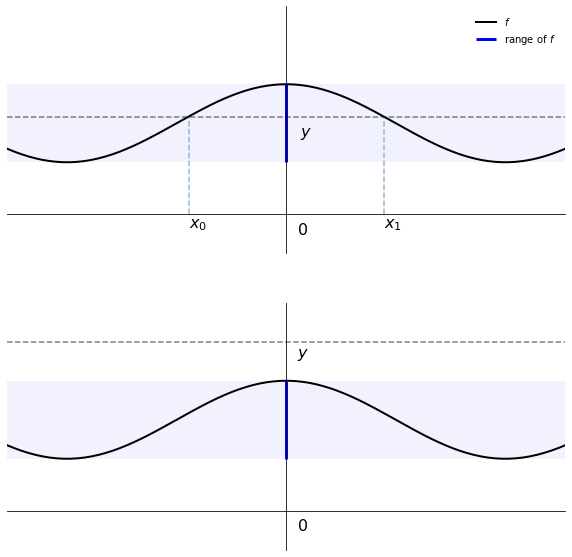

In [28]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4


xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for ax in axes:
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax),
           yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()

In the first plot, there are multiple solutions, as the function is not one-to-one, while in the second there are no solutions, since $y$ lies outside the range of $f$. Can we impose conditions on $A$ in (2.3) that rule out these problems?

In this context, the most important thing to recognize about the expression $Ax$ is that it corresponds to a linear combination of the columns of $A$. In particular, if  $a_1,\dots,a_k$ are the columns of $A$ then

$$
Ax = x_1a_1 +\dots+ x_ka_k
$$

Hence the range of $f(x) = Ax$ is exactly the span of the columns of $A$. We want the range to be large so that it contains arbitrary $y$. As you might recall, the condition that we want for the span to be large is linear independence. A happy fact is that linear independence of the columns of $A$ also gives us uniqueness.

Indeed, it follows from our earlier discussion that if $\{a_1,\dots,a_k\}$ are linearly independent and $y = Ax = x_1a_1 +\dots+ x_ka_k$ then no $z\neq x$ satisfies $y=Az$

### The Square Matrix Case

Let’s discuss some more details, starting with the case where $A$ is $n\times n$. This is the familiar case where the number of unknowns equals the number of equations. For arbitrary $y\in\mathbb R^n$, we hope to find a unique $x\in\mathbb R^n$ such that $y=Ax$.

In view of the observations immediately above, if the columns of $A$ are linearly independent, then their span, and hence the range of $f(x) = Ax$ is for all $\mathbb R^n$. Hence there always exists an $x$ such that $y=Ax$. Moreover, the solution is unique. In particular, the following are equivalent
1. The columns of $A$ are linearly independent.
2. For any $y\in\mathbb R^n$, the equation $y=Ax$ has a unique solution.

The property of having linearly independent columns is sometimes expressed as having *full column rank*.

**Inverse Matrices**

Can we give some sort of expression for the solution? If $y$ and $A$ are scalar with $A\neq 0$, then the solution is $x=A^{-1}y$. A similar expression is available in the matrix case. In particular, if square matrix $A$ has full column rank, then it possesses a multiplicative *inverse matrix* $A^{-1}$, with the property that $AA^{-1} = A^{-1}A = I$. As a consequence, if we pre-multiply both sides of $y = Ax$ by $A^{-1}$, we get $x=A^{-1}y$.

This is the solution that we’re looking for.

**Determinants**

Another quick comment about square matrices is that to every such matrix we assign a unique number called the *determinant* of the matrix — you can find the expression for it [here](https://en.wikipedia.org/wiki/Determinant). If the determinant of $A$ is not zero, then we say that $A$  is *nonsingular*.

Perhaps the most important fact about determinants is that $A$ is nonsingular if and only if $A$ is of full column rank. This gives us a useful one-number summary of whether or not a square matrix can be inverted.

### More Rows than Columns

This is the $n\times k$ case with $n > k$. This case is very important in many settings, not least in the setting of linear regression (where $n$ is the number of observations, and $k$ is the number of explanatory variables).

Given arbitrary $y\in\mathbb R^n$, we seek an $x\in\mathbb R^k$ such that $y = Ax$. In this setting, the existence of a solution is highly unlikely. Without much loss of generality, let’s go over the intuition focusing on the case where the columns of $A$ are linearly independent.

It follows that the span of the columns of $A$ is a $k$-dimensional subspace of $\mathbb R^n$. This span is very “unlikely” to contain arbitrary $y\in\mathbb R^n$.

To see why, recall the figure above, where $k=2$ and $n=3$. Imagine an arbitrarily chosen $y\in\mathbb R^3$, located somewhere in that three-dimensional space. What’s the likelihood that $y$ lies in the span of $\{a_1, a_2\}$ (i.e., the two dimensional plane through these points)? In a sense, it must be very small, since this plane has zero “thickness”.

As a result, in the $n>k$ case we usually give up on existence. However, we can still seek the best approximation, for example, an $x$ that makes the distance $\Vert y- Ax\Vert$ as small as possible. To solve this problem, one can use either calculus or the theory of orthogonal projections. The solution is known to be $\hat x = (A'A)^{-1}A'y$. See these [notes](https://python.quantecon.org/_static/lecture_specific/linear_algebra/course_notes.pdf) in chapter 3.

### More Columns than Rows

This is the $n\times k$ case with $n<k$, so there are fewer equations than unknowns. In this case there are either no solutions or infinitely many — in other words, uniqueness never holds. 

For example, consider the case where $k=2$ and $n=3$. Thus, the columns of $A$ consists of 3 vectors in $\mathbb R^2$. This set can never be linearly independent, since it is possible to find two vectors that span $\mathbb R^2$.

(For example, use the canonical basis vectors)

It follows that one column is a linear combination of the other two. For example, let’s say that $a_1 = \alpha a_2 +\beta a_3$. Then if $y=Ax=x_1a_1 + x_2a_2+x_3a_3$, we can also write

$$
y = x_1(\alpha a_2 +\beta a_3) + x_2a_2+x_3a_3 = (x_1\alpha + x_2)a_2 +(x_1\beta + x_3)a_3
$$

In other words, uniqueness fails.

### Linear Equations with SciPy

Here’s an illustration of how to solve linear equations with SciPy’s linalg submodule. All of these routines are Python front ends to time-tested and highly optimized FORTRAN code

In [29]:
A = ((1, 2), (3, 4))
A = np.array(A)
y = np.ones((2, 1))  # Column vector
det(A)  # Check that A is nonsingular, and hence invertible

-2.0

In [30]:
A_inv = inv(A)  # Compute the inverse
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [31]:
x = A_inv @ y  # Solution
A @ x          # Should equal y

array([[1.],
       [1.]])

In [32]:
solve(A, y)  # Produces the same solution

array([[-1.],
       [ 1.]])

Observe how we can solve for $x = A^{-1}y$ by either via `inv(A) @ y`, or using `solve(A, y)`. The latter method uses a different algorithm (LU decomposition) that is numerically more stable, and hence should almost always be preferred.

To obtain the least-squares solution $\hat x = (A'A)^{-1}A'y$ use `scipy.linalg.lstsq(A, y)`.

## Eigenvalues and Eigenvectors

Let $A$ be an $n\times n$ square matrix. If $\lambda$ is scalar and $\nu$ is a non-zero in $\mathbb R^n$ such that
$$
A\nu = \lambda \nu
$$
then we say that $\lambda$ is an *eigenvalue* of $A$, and $\nu$ is an *eigenvector*. Thus, an eigenvector of $A$ is a vector such that when the map $f(x) = Ax$ is applied, $\nu$ is merely scaled.The next figure shows two eigenvectors (blue arrows) and their images under $A$ (red arrows).

As expected, the image $A\nu$ of each $\nu$ is just a scaled version of the original

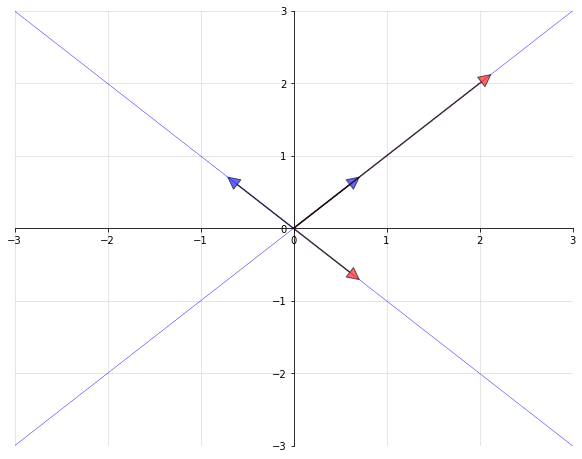

In [33]:
A = ((1, 2),
     (2, 1))
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

The eigenvalue equation is equivalent to $(A-\lambda I)v = 0$, and this has a nonzero solution $v$ only when the columns of $A -\lambda I$ are linearly dependent. This in turn is equivalent to stating that the determinant is zero.

Hence to find all eigenvalues, we can look for $\lambda$ such that the determinant of $A - \lambda I$ is zero.

This problem can be expressed as one of solving for the roots of a polynomial in $\lambda$ of degree $n$. This in turn implies the existence of $n$ solutions in the complex plane, although some might be repeated.

Some nice facts about the eigenvalues of a square matrix $A$ are as follows

1. The determinant of $A$ equals  the product of the eigenvalues.  
2. The trace of $A$ (the sum of the elements on the principal diagonal) equals the sum of the eigenvalues.  
3. If $A$ is symmetric, then all of its eigenvalues are real.  
4. If $A$ is invertible and $\lambda_1,\ldots,\lambda_n$ are its eigenvalues, then the eigenvalues of $A^{-1}$ are $1/\lambda_1,
\ldots, 1/\lambda_n$.  

A corollary of the first statement is that a matrix is invertible if and only if all its eigenvalues are nonzero. Using SciPy, we can solve for the eigenvalues and eigenvectors of a matrix as follows

In [36]:
A = ((1, 2),
     (2, 1))

A = np.array(A)
evals, evecs = eig(A)
evals, evecs

(array([ 3.+0.j, -1.+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Note that the columns of evecs are the eigenvectors. Since any scalar multiple of an eigenvector is an eigenvector with the same eigenvalue (check it), the eig routine normalizes the length of each eigenvector to one.

### Generalized Eigenvalues

It is sometimes useful to consider the *generalized eigenvalue problem*, which, for given matrices $A$ and $B$, seeks generalized eigenvalues $\lambda$ and eigenvectors $\nu$ such that
$$
A\nu = \lambda B\nu
$$
This can be solved in SciPy via `scipy.linalg.eig(A, B)`. Of course, if $B$ is square and invertible, then we can treat the generalized eigenvalue problem as an ordinary eigenvalue problem $B^{-1}Av = \lambda \nu$, but this is not always the case.


## Further Topics

We round out our discussion by briefly mentioning several other important topics.

### Series Expansions
Recall the usual summation formula for a geometric progression, which states that if $\vert a\vert < 1$, then $\sum_{k=0}^\infty a^k = (1-a)^{-1}$. A generalization of this idea exists in the matrix setting.

**Matrix Norms**

Let $A$ be a square matrix, and let
$$
\Vert A\Vert := \max_{\Vert x\Vert = 1}\Vert Ax\Vert
$$

The norms on the right-hand side are ordinary vector norms, while the norm on the left-hand side is a *matrix norm* — in this case, the so-called *spectral norm*. For example, for a square matrix $S$, the condition $\Vert S\Vert < 1$ means that $S$ is *contractive*, in the sense that it pulls all vectors towards the origin.

**Neumann’s Theorem**

Let $A$ be a square matrix and let $A^k$ is the $k$-th power of $A$. Neumann’s theorem states the following: If $\Vert A^k\Vert < 1$ for some $k\in\mathbb N$, then $I-A$ is invertible, and
$$
\begin{equation}
(I-A)^{-1} = \sum_{k=0}^\infty A^k
\end{equation}\tag{2.4}
$$

**Spectral Radius**

A result known as Gelfand’s formula tells us that, for any square matrix $A$,

$$
\rho(A) = \lim_{k\rightarrow\infty}\Vert A^k\Vert^{\frac{1}{k}}
$$
Here $\rho(A)$ is the *spectal radius*, defined as $\max_i|\lambda_i|$, where $\{\lambda_i\}_i$ is the set of eigenvalues of $A$. As a consequence of Gelfand’s formula, if all eigenvalues are strictly less than one in modulus, there exists a $k$ with $\Vert A^k\Vert <1$. In which case (2.4) is valid.

### Positive Definite Matrices

Let $A$ be a symmetric $n\times n$ matrix. We say that $A$ is
1. *positive definite* if $x'Ax > 0$ for every $x\in\mathbb R^n-\{0\}$
1. *positive semi-definite* or *nonnegative definite* if $x'Ax \geq 0$ for every $x\in\mathbb R^n$

Analogous definitions exist for negative definite and negative semi-definite matrices. It is notable that if $A$ is positive definite, then all of its eigenvalues are strictly positive, and hence $A$ is invertible (with positive definite inverse).

### Differentiating Linear and Quadratic Forms

The following formulas are useful in many economic contexts. Let
- $z,x$ and $a$ all be $n\times 1$ vectors
- $A$ be an $n\times n$ matrix
- $B$ be an $m\times n$ matrix and $y$ be an $m\times 1$ vector

Then
1. $\frac{\partial a'x}{\partial x}$ = $a$
1. $\frac{\partial Ax}{\partial x}$ = $A'$
1. $\frac{\partial x'Ax}{\partial x}$ = $(A + A')x$
1. $\frac{\partial y'Bz}{\partial y}$ = $Bz$
1. $\frac{\partial y'Bz}{\partial B}$ = $yz'$

## Exercises

**Exercise 2.1**

Let $x$ be a given $n \times 1$ vector and consider the problem

$$
v(x) =  \max_{y,u} \left\{ - y'P y - u' Q u \right\}
$$

subject to the linear constraint

$$
y = A x + B u
$$

Here

- $ P $ is an $ n \times n $ matrix and $ Q $ is an $ m \times m $ matrix  
- $ A $ is an $ n \times n $ matrix and $ B $ is an $ n \times m $ matrix  
- both $ P $ and $ Q $ are symmetric and positive definite  


(What must the dimensions of $ y $ and $ u $ be to make this a well-posed problem?)

One way to solve the problem is to form the Lagrangian

$$
\mathcal L = - y' P y - u' Q u + \lambda' \left[A x + B u - y\right]
$$

where $ \lambda $ is an $ n \times 1 $ vector of Lagrange multipliers.

Try applying the formulas given above for differentiating quadratic and linear forms to obtain the first-order conditions for maximizing $ \mathcal L $ with respect to $ y, u $ and minimizing it with respect to $ \lambda $.

Show that these conditions imply that

1. $ \lambda = - 2 P y $.  
1. The optimizing choice of $ u $ satisfies $ u = - (Q + B' P B)^{-1} B' P A x $.  
1. The function $ v $ satisfies $ v(x) = - x' \tilde P x $ where $ \tilde P = A' P A - A'P B (Q + B'P B)^{-1} B' P A $.  


As we will see, in economic contexts Lagrange multipliers often are shadow prices.

>**Note**
>
>If we don’t care about the Lagrange multipliers, we can substitute the constraint into the objective function, and then just maximize $ -(Ax + Bu)'P (Ax + Bu) - u' Q u $ with respect to $ u $.  You can verify that this leads to the same maximizer.

<details>
<summary><b>Solution to exercise 2.1</b></summary>
We have an optimization problem:

$$
v(x) = \max_{y,u} \{ -y'Py - u'Qu \}
$$

s.t.

$$
y = Ax + Bu
$$

with primitives

- $ P $ be a symmetric and positive semidefinite $ n \times n $
  matrix  
- $ Q $ be a symmetric and positive semidefinite $ m \times m $
  matrix  
- $ A $ an $ n \times n $ matrix  
- $ B $ an $ n \times m $ matrix  


The associated Lagrangian is:

$$
L = -y'Py - u'Qu + \lambda' \lbrack Ax + Bu - y \rbrack
$$

**Step 1.**

Differentiating Lagrangian equation w.r.t y and setting its derivative
equal to zero yields

$$
\frac{ \partial L}{\partial y} = - (P + P') y - \lambda = - 2 P y - \lambda = 0 \:,
$$

since P is symmetric.

Accordingly, the first-order condition for maximizing L w.r.t. y implies

$$
\lambda = -2 Py \:
$$

**Step 2.**

Differentiating Lagrangian equation w.r.t. u and setting its derivative
equal to zero yields

$$
\frac{ \partial L}{\partial u} = - (Q + Q') u - B'\lambda = - 2Qu + B'\lambda = 0 \:
$$

Substituting $ \lambda = -2 P y $ gives

$$
Qu + B'Py = 0 \:
$$

Substituting the linear constraint $ y = Ax + Bu $ into above
equation gives

$$
Qu + B'P(Ax + Bu) = 0
$$

$$
(Q + B'PB)u + B'PAx = 0
$$

which is the first-order condition for maximizing $ L $ w.r.t. $ u $.

Thus, the optimal choice of u must satisfy

$$
u = -(Q + B'PB)^{-1}B'PAx \:,
$$

which follows from the definition of the first-order conditions for
Lagrangian equation.

**Step 3.**

Rewriting our problem by substituting the constraint into the objective
function, we get

$$
v(x) = \max_{u} \{ -(Ax+ Bu)'P(Ax+Bu) - u'Qu \} \:
$$

Since we know the optimal choice of u satisfies $ u = -(Q +
B'PB)^{-1}B'PAx $, then

$$
v(x) =  -(Ax+ B u)'P(Ax+B u) - u'Q u  \,\,\,\, with \,\,\,\, u = -(Q + B'PB)^{-1}B'PAx
$$

To evaluate the function

$$
\begin{aligned}
v(x) &=  -(Ax+ B u)'P(Ax+Bu) - u'Q u \\
&= -(x'A' + u'B')P(Ax+Bu) - u'Q u \\
&= - x'A'PAx - u'B'PAx - x'A'PBu - u'B'PBu - u'Qu \\
&= - x'A'PAx - 2u'B'PAx - u'(Q + B'PB) u
\end{aligned}
$$

For simplicity, denote by $ S := (Q + B'PB)^{-1} B'PA $, then $ u = -Sx $.

Regarding the second term $ - 2u'B'PAx $,

$$
\begin{aligned}
-2u'B'PAx &= -2 x'S'B'PAx  \\
& = 2 x'A'PB( Q + B'PB)^{-1} B'PAx
\end{aligned}
$$

Notice that the term $ (Q + B'PB)^{-1} $ is symmetric as both P and Q
are symmetric.

Regarding the third term $ - u'(Q + B'PB) u $,

$$
\begin{aligned}
-u'(Q + B'PB) u &= - x'S' (Q + B'PB)Sx \\
&= -x'A'PB(Q + B'PB)^{-1}B'PAx
\end{aligned}
$$

Hence, the summation of second and third terms is
$ x'A'PB(Q + B'PB)^{-1}B'PAx $.

This implies that

$$
\begin{aligned}
 v(x) &= - x'A'PAx - 2u'B'PAx - u'(Q + B'PB) u\\
 &= - x'A'PAx + x'A'PB(Q + B'PB)^{-1}B'PAx \\
 &= -x'[A'PA - A'PB(Q + B'PB)^{-1}B'PA] x
\end{aligned}
$$

Therefore, the solution to the optimization problem
$ v(x) = -x' \tilde{P}x $ follows the above result by denoting
$ \tilde{P} := A'PA - A'PB(Q + B'PB)^{-1}B'PA $
</details>